# QUESTION

1. Which product lines have the highest and the lowest sales? (show in a chart)
2. Show sales performance overtime, is there any pattern? (show in a chart)
3. How does deal size correlate with total sales? what is the percentage of contribution for eachtype of deal?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
a = pd.read_excel('/content/Salinan dari Sales Data - New.xlsx')

In [ ]:
a.to_csv('Sales Data.csv', index=False)

In [ ]:
df = pd.read_csv('/content/Sales Data.csv')

# Prepocessing Data

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


## Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


## MIssing Value

In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERDATE,0
STATUS,0
PRODUCTLINE,0
PRODUCTCODE,0
CUSTOMERNAME,0
CITY,0
DEALSIZE,0


## Duplicate Value

In [ ]:
print (f' Nilai duplikat :', {df.duplicated().sum()})

 Nilai duplikat : {np.int64(1)}


In [ ]:
df = df.drop_duplicates()
print (f' Nilai duplikat :', {df.duplicated().sum()})

 Nilai duplikat : {np.int64(0)}


## Mengambil data yang statusnya Shipped dan Resolved

In [ ]:
jumlah_status = df['STATUS'].value_counts()
print(jumlah_status)

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


In [ ]:
df_proses = df.copy()
# Filter status yang tidak diinginkan
status_tidak_diinginkan = ['Cancelled', 'On Hold', 'In Process', 'Disputed']
# Mask untuk memfilter status
mask_status = ~df_proses['STATUS'].isin(status_tidak_diinginkan)
# Terapkan mask ke dataframe
df_proses = df_proses[mask_status]
# Cetak jumlah baris sebelum dan sesudah filtering
print("Jumlah baris sebelum filtering:", len(df))
print("Jumlah baris sesudah filtering:", len(df_proses))

Jumlah baris sebelum filtering: 2823
Jumlah baris sesudah filtering: 2664


In [ ]:
status = df_proses['STATUS'].value_counts()
print(status)

STATUS
Shipped     2617
Resolved      47
Name: count, dtype: int64


## Menambah kolom Revenue

In [ ]:
# Membuat kolom baru bernama REVENUE
df_proses['REVENUE'] = df_proses['QUANTITYORDERED'] * df_proses['PRICEEACH']
# Validasi data untuk memastikan kolom REVENUE memiliki nilai yang valid
print("Validasi data untuk memastikan kolom REVENUE memiliki nilai yang valid:")
print(df_proses['REVENUE'].describe())
df_proses.head()

Validasi data untuk memastikan kolom REVENUE memiliki nilai yang valid:
count    2664.000000
mean     2922.300300
std      1077.855291
min       553.950000
25%      2100.000000
50%      2800.000000
75%      3700.000000
max      9048.160000
Name: REVENUE, dtype: float64


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


# Data Visualization

In [ ]:
df_clean = df_proses.copy()

## Product line dengan penjualan terendah dan tertinggi

In [ ]:
jumlah_productline = df_clean['PRODUCTLINE'].value_counts()
print(jumlah_productline)

PRODUCTLINE
Classic Cars        922
Vintage Cars        567
Motorcycles         324
Trucks and Buses    286
Planes              283
Ships               207
Trains               75
Name: count, dtype: int64


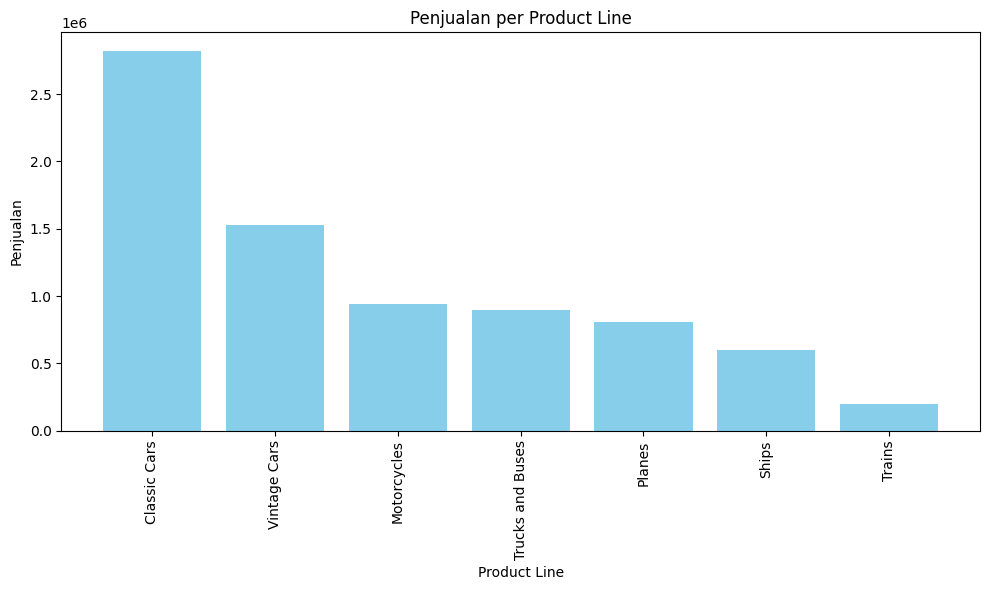

Penjualan per Product Line:
        PRODUCTLINE     REVENUE
0      Classic Cars  2817515.14
6      Vintage Cars  1528213.53
1       Motorcycles   941683.81
5  Trucks and Buses   896017.45
2            Planes   807105.12
3             Ships   599668.69
4            Trains   194804.26


In [ ]:
# Menghitung penjualan per productline
dfplot = df_clean.groupby('PRODUCTLINE')['REVENUE'].sum().reset_index()
dfplot = dfplot.sort_values(by='REVENUE', ascending=False)

# Membuat diagram batang
plt.figure(figsize=(10,6))
plt.bar(dfplot['PRODUCTLINE'], dfplot['REVENUE'], color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Penjualan')
plt.title('Penjualan per Product Line')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Penjualan per Product Line:")
print(dfplot)

## Sales performance overtime

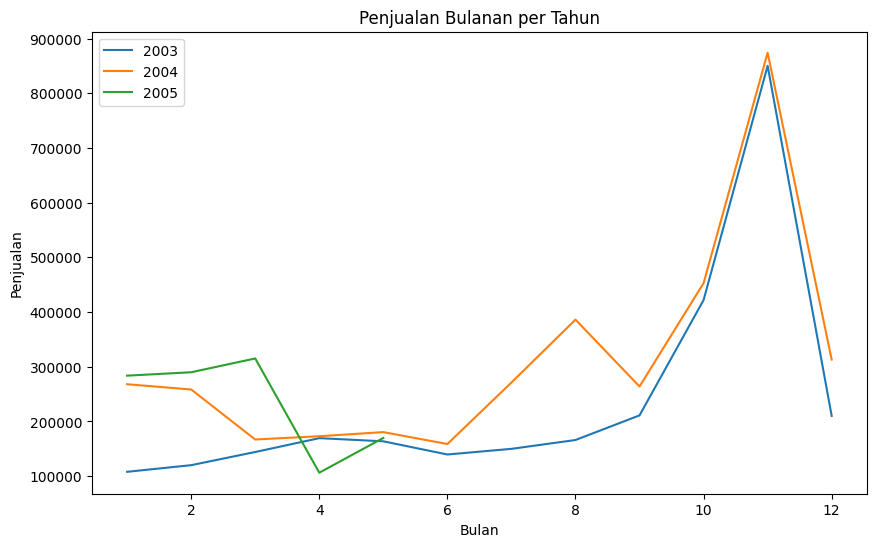

Penjualan Bulanan per Tahun:
    TAHUN  BULAN    REVENUE
0    2003      1  107885.96
1    2003      2  120036.80
2    2003      3  144096.23
3    2003      4  169421.03
4    2003      5  163654.12
5    2003      6  139552.84
6    2003      7  149869.73
7    2003      8  166026.32
8    2003      9  211045.86
9    2003     10  421885.09
10   2003     11  850203.27
11   2003     12  210117.21
12   2004      1  268015.87
13   2004      2  258389.05
14   2004      3  166958.56
15   2004      4  172935.80
16   2004      5  180469.64
17   2004      6  158696.24
18   2004      7  271103.61
19   2004      8  386106.59
20   2004      9  263854.26
21   2004     10  452796.13
22   2004     11  874092.26
23   2004     12  313055.93
24   2005      1  283680.46
25   2005      2  289902.30
26   2005      3  315131.94
27   2005      4  106220.56
28   2005      5  169804.34


In [ ]:
df_line= df_clean.copy()

# Ekstrak tahun dan bulan dari tanggal
df_line['TAHUN'] = df_line['ORDERDATE'].dt.year
df_line['BULAN'] = df_line['ORDERDATE'].dt.month

# Hitung penjualan bulanan per tahun
penjualan_bulanan = df_line.groupby(['TAHUN', 'BULAN'])['REVENUE'].sum().reset_index()

# Diagram garis penjualan bulanan per tahun
plt.figure(figsize=(10,6))
for tahun in penjualan_bulanan['TAHUN'].unique():
    data_tahun = penjualan_bulanan[penjualan_bulanan['TAHUN'] == tahun]
    plt.plot(data_tahun['BULAN'], data_tahun['REVENUE'], label=tahun)

plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.title('Penjualan Bulanan per Tahun')
plt.legend()
plt.show()

print("Penjualan Bulanan per Tahun:")
print(penjualan_bulanan)

## How does deal size correlate with total sales? what is the percentage of contribution for eachtype of deal?

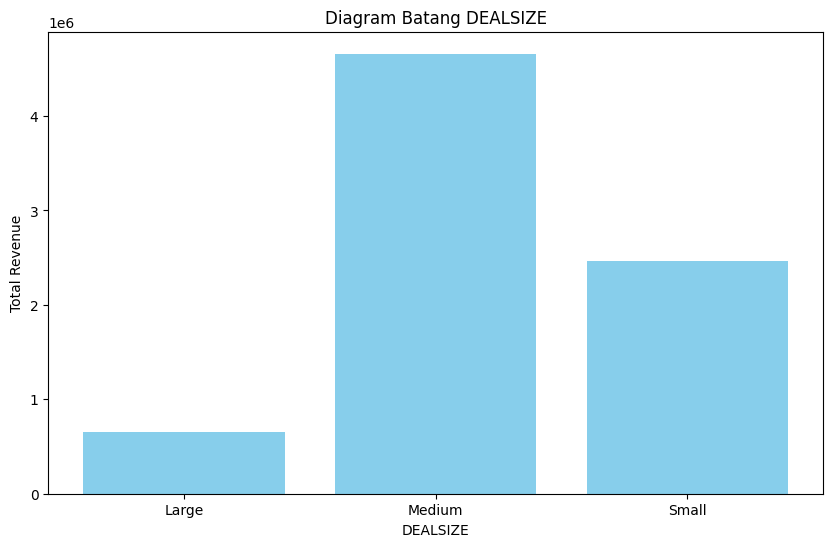

Total revenue untuk setiap DEALSIZE:
  DEALSIZE     REVENUE
0    Large   658548.16
1   Medium  4660310.00
2    Small  2466149.84


In [ ]:
# Mengelompokkan data berdasarkan DEALSIZE dan menghitung total revenue
total_revenue_dealsize = df_clean.groupby('DEALSIZE')['REVENUE'].sum().reset_index()

# Membuat plot
plt.figure(figsize=(10,6))
plt.bar(total_revenue_dealsize['DEALSIZE'], total_revenue_dealsize['REVENUE'], color='skyblue')
plt.title('Diagram Batang DEALSIZE')
plt.xlabel('DEALSIZE')
plt.ylabel('Total Revenue')
plt.show()

print("Total revenue untuk setiap DEALSIZE:")
print(total_revenue_dealsize)

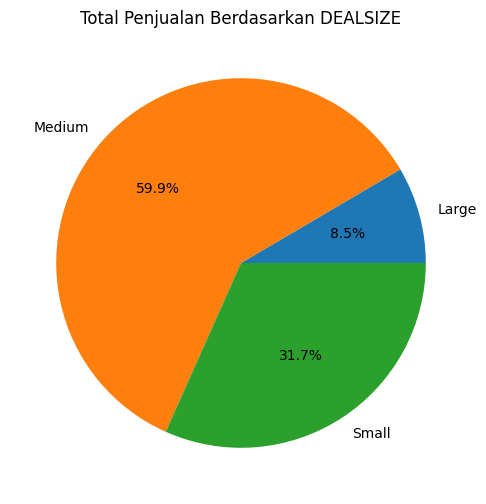

In [ ]:
# Diagram pie total penjualan berdasarkan DEALSIZE
plt.figure(figsize=(10,6))
plt.pie(total_revenue_dealsize['REVENUE'], labels=total_revenue_dealsize['DEALSIZE'], autopct='%1.1f%%')
plt.title('Total Penjualan Berdasarkan DEALSIZE')
plt.show()